<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Cars_load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used car's price prediction

# Шаг 1: загрузка и первичный анализ данных

## Описание задачи

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?!  
Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!

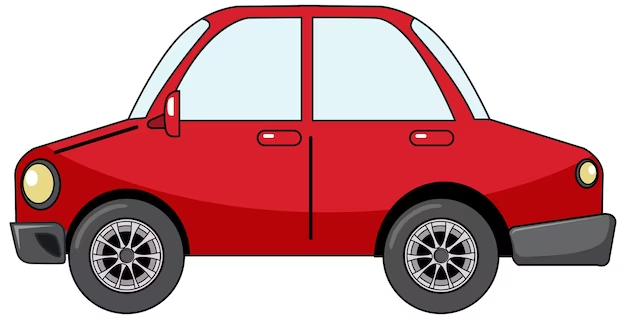

## Импорт библиотек, константы и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from urllib.parse import urlencode

In [ ]:
RANDOM_STATE = 42

Будем работать с данными `train.csv`.

Когда финальная модель будет готова, с помощью нее предскажем цены на машины из файла `test.csv` (там ответов нет).

In [ ]:
TEST = "https://www.dropbox.com/s/asf4b1z1yme5o7u/cars_test.csv?dl=1"
TRAIN = "https://www.dropbox.com/s/qk4b79i7c078sxm/cars_train.csv?dl=1"

In [ ]:
data = pd.read_csv(TRAIN)

In [ ]:
data.shape

(396212, 15)

Выделим целевую переменную `sellingprice` в отдельную переменную `y`, а `X` - матрица объект-признак.

In [ ]:
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']

**Описание данных**

**_Признаки_**
- `year` - год производства
- `make` - производитель
- `model` - модель
- `trim` - модификация
- `body` - тип кузова
- `transmission` - тип КПП
- `vin` - идентификатор (вин)
- `state` - штат регистрации
- `condition` - состояние по шкале (1-5)
- `odometer` - пробег в милях
- `color` - цвет кузова
- `interior` - цвет интерьера
- `seller` - продавец
- `saledate` - дата продажи

**_Целевой признак_**
- `sellingprice` - стоимость продажи

In [ ]:
X.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2013,Dodge,Dart,Limited,Sedan,automatic,1c3cdfca5dd293552,mo,4.6,13957.0,gray,black,chrysler capital,Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
1,2014,Honda,Civic,LX,Sedan,automatic,19xfb2f56ee228781,ca,5.0,2401.0,gray,black,"ahfc/honda lease trust/hvt, inc.",Thu Feb 26 2015 04:00:00 GMT-0800 (PST)
2,2012,Chevrolet,Traverse,LT,suv,automatic,1gnkrged3cj244704,wi,2.4,70046.0,white,black,capital one auto finance,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
3,2014,Nissan,Versa Note,1.6 SV,Hatchback,automatic,3n1ce2cp9el407766,fl,2.6,23415.0,gray,black,florida auto financial group,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
4,2014,Nissan,Versa,1.6 SV,sedan,automatic,3n1cn7ap4el813308,il,3.4,17040.0,blue,black,nissan motor acceptance corporation,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)


Посмотрим на типы колонок и число пропущенных значений в них.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396212 entries, 0 to 396211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          396212 non-null  int64  
 1   make          388993 non-null  object 
 2   model         388922 non-null  object 
 3   trim          388727 non-null  object 
 4   body          386883 non-null  object 
 5   transmission  350025 non-null  object 
 6   vin           396212 non-null  object 
 7   state         396212 non-null  object 
 8   condition     387759 non-null  float64
 9   odometer      396151 non-null  float64
 10  color         395679 non-null  object 
 11  interior      395679 non-null  object 
 12  seller        396212 non-null  object 
 13  saledate      396212 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 42.3+ MB


Посмотрим на числовые признаки

In [ ]:
X.describe()

,year,condition,odometer
count,396212.000000,387759.000000,396151.000000
mean,2010.041442,3.425687,68336.479029
std,3.977384,0.949871,53559.280598
min,1982.000000,1.000000,1.000000
25%,2007.000000,2.700000,28259.000000
50%,2012.000000,3.600000,52113.000000
75%,2013.000000,4.200000,99300.000000
max,2015.000000,5.000000,999999.000000


Посмотрим на категориальные признаки

In [ ]:
X.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,388993,388922,388727,386883,350025,396212,396212,395679,395679,396212,396212
unique,91,949,1899,83,2,396212,38,20,17,12530,3544
top,Ford,Altima,Base,Sedan,automatic,1c3cdfca5dd293552,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,66391,13969,39538,141921,337646,1,59164,78576,173230,14323,3783


Признак `vin` это уникальный идентификатор машины, поэтому удалим его.

In [ ]:
X.drop('vin', axis=1, inplace=True)